## Web scraping IMDB

## Importing required packages

In [1]:
import requests
from bs4 import BeautifulSoup
import re

## create the url and get the content of the webpage

In [2]:
url = 'https://www.imdb.com/search/title/?genres=drama&groups=top_250&sort=user_rating,desc'
response = requests.get(url)

## Creating the soup

In [3]:
soup = BeautifulSoup(response.content, 'html.parser')

## Extract information from webpage

In [4]:
movies = soup.find_all(class_='lister-item')
first_movie = movies[0]

## Creating a dictionary to store all my data

In [5]:
movies_dict = {
    'title': [],
    'year': [],
    'duration': [],
    'rating': []
}

# looping through all my movie to extract the info that I need for each movie
# i.e. title, year, duration, rating
for movie in movies:
    title = movie.find(class_='lister-item-header').find('a').text
    year = int(re.search("\d+", movie.find(class_='lister-item-year').text)[0])
    duration = int(movie.find(class_='runtime').text.strip(' min'))
    rating = float(movie.find(class_='ratings-imdb-rating').find('strong').text)
    movies_dict['title'].append(title)
    movies_dict['year'].append(year)
    movies_dict['duration'].append(duration)
    movies_dict['rating'].append(rating)

## Checking that I got all the movies back

In [6]:
len(movies_dict['title'])

50

## Importing libraries to do some data analysis

In [7]:
import pandas as pd
import numpy as np

## Creating a dataframe out of my dictionary

In [8]:
movies_df = pd.DataFrame(movies_dict)

In [9]:
movies_df.head()

,title,year,duration,rating
0,Cadena perpetua,1994,142,9.3
1,El padrino,1972,175,9.2
2,El caballero oscuro,2008,152,9.0
3,El padrino: Parte II,1974,202,9.0
4,Joker,2019,122,8.9


## Importing matplotlib to plot some data

In [10]:
import matplotlib
%matplotlib inline

## Plotting the duration

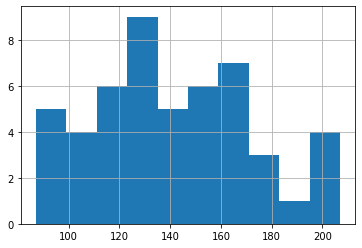

In [11]:
movies_df['duration'].hist()

In [12]:
movies_df

,title,year,duration,rating
0,Cadena perpetua,1994,142,9.3
1,El padrino,1972,175,9.2
2,El caballero oscuro,2008,152,9.0
3,El padrino: Parte II,1974,202,9.0
4,Joker,2019,122,8.9
5,El señor de los anillos: El retorno del rey,2003,201,8.9
6,Pulp Fiction,1994,154,8.9
7,La lista de Schindler,1993,195,8.9
8,12 hombres sin piedad,1957,96,8.9
9,El club de la lucha,1999,139,8.8


In [13]:
import xlwings as xw
book = xw.Book() # creating a book => excel file
sheet = book.sheets['Sheet1'] # selecting a sheet in the book
sheet.range('A1').value = movies_df # writing my dataframe in excel

<Picture 'movie durations' in <Sheet [Book7]Sheet1>>

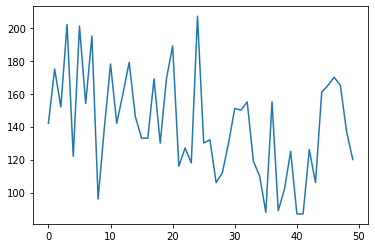

In [14]:
import matplotlib.pyplot as plt
figure = plt.figure()
plt.plot(movies_df['duration'])
sheet.pictures.add(figure, name='movie durations')